# Linear Regression (Ordinary Least Square)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
np.random.seed(42)

In [3]:
#@title Helper functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# Helper functions
def draw_grid(x_lim=np.array([-4, 4]), y_lim=np.array([-4, 4])):
    """Draw an empty grid"""
    ax = plt.gca()
    # Draw ticks and grid
    for i in range(int(x_lim.min()), int(x_lim.max())):
        ax.axvline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([i, i], [0.05, -0.05], color='#2c3e50')
    for i in range(int(y_lim.min()), int(y_lim.max())):
        ax.axhline(i, linestyle='--', color='#ecf0f1', zorder=0)
        ax.plot([0.05, -0.05], [i, i], color='#2c3e50')
    # x and y axis
    ax.axhline(0, color='#2c3e50', zorder=0)
    ax.axvline(0, color='#2c3e50', zorder=0)
    ax.scatter([0], [0], color='#c0392b', zorder=0)

    ax.grid(False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

# Example of Linear Regression

**Problem**: Predicting housing prices using their sizes.

![](https://cdn.discordapp.com/attachments/777874357233647646/845591678173708298/Screen_Shot_2021-05-22_at_16.19.19.jpg)

**Solution**: 

- Find the best fitted line for the given data points.
- Use the fitted line to predict unseen data points.

![](https://cdn.discordapp.com/attachments/777874357233647646/845584376585912360/1FIqrVpEUiPWa10qruDs8yg.png)

**Hypothesis function**: 
* $\hat{y}=wx+b$

**Notation**:
  * $\hat{y}$ = Predicted price
  * y = Price (**a vector**)
  * x = Size (**a vector**)
  * w =  weight (slope)
  * b = bias (y_intercept)


**Question**: Given w = 0.5 and b = 50. What would the house's predicted price if its size is 100 feet squared?

- A: 50 (thousand dollars)
- B: 100 (thousand dollars)
- C: 150 (thousand dollars)
- D: 200 (thousand dollars)

# General definition

Linear Regression 
- supervised machine learning algorithm
- solves a **regression** problem. 
- **Input**: **vector** $x \in R^n$ 
- **Output**: **scalar** $y \in R$.
- The value that our model predicts y is called $\hat{y}$, which is defined as:

$$
\hat{y} = w_1x_1 + w_2x_2 + \dots + w_nx_n + b = \sum^n{w_ix_i} + b = \text{dot_product}(w,x) + b
$$

where

<div align="center">

$w \in R^n$, and $b \in R$ are parameters

$w$ is the vector of **coefficients**, also known as set of **weights**

$b$ is the **intercept**, also known as the **bias**

</div>

Our goal is to find the **best fitting line (or hyperplane) that minimizes mean squared error (MSE)** between our target variable (y) and our predicted output $\hat y$ over all samples in our dataset


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y - \hat y)^2$$

This is also known as **Ordinary Least Squares (OLS) Linear Regression**



**That means we need to estimate parameters w and b**

We will use an **optimization algorithm** known as **Gradient Descent** (and later Stochastic Gradient Descent or SGD) to solve this problem

# Let's get some data

We are given the dataset with the following columns (features): how much a company spends on Radio, TV and Newspaper advertising each year and its annual Sales in terms of units sold. 

We are trying to develop an equation that will let us to **predict units sold in thousands (Sales column) based on how much a company spends on advertising (US dollar, in thousand)**. The rows represent companies.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',
                 index_col=0)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 4)

In [ ]:
# df.describe()

# One-feature Linear Regression

We will estimate of sales given a company's TV  advertising spent


In [ ]:
X = df.TV.values
y = df.Sales.values

In [ ]:
X.shape

(200,)

In [ ]:
X = X[:,np.newaxis]
X.shape

(200, 1)

In [ ]:
y.shape

(200,)

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

Our dataset

$$
X = 
\begin{pmatrix} 
    x^{(1)} \\
    x^{(2)} \\
    \dots \\
    x^{(m)} \\
\end{pmatrix}_{m \times 1}
$$

**Question**: for the dataset above, what is the value of m?
- A: 1
- B: 200
- C: 201
- D: I don't know....

With $\vec{w}$ is the weights vector

$$
\begin{pmatrix}
w
\end{pmatrix}_{1 \times 1}
$$

and $b$ is the bias (scalar)

In [ ]:
# let's pick a random value for w
w = np.array([0.047])
print(w)
print(w.shape)

[0.047]
(1,)


In [ ]:
# let's pick a random value for b
b = np.array(7)
print(b)
print(b.shape)

7
()


$$Sales = TV*Weight + Bias$$
$$y = Xw + b$$
- **TV is our independent variable**. In machine learning we also call these variables **features**.
- **Sales is dependent variable**. This is what we have to predict
- **Weight is the coefficient** for the TV independent variable. In machine learning we call coefficients weights.
- **Bias is the intercept where our line intercepts the y-axis**. In machine learning we can call intercepts bias. Bias offsets all predictions that we make.


We will try to **learn the correct values for Weight and Bias**. By the end of our training, our equation will approximate the line of best fit.

Let's calculate our predictions y_hat

In [ ]:
y_hat = w*X + b

In [ ]:
y_hat.shape

(200, 1)

**Question**: Without running the code, can someone tell me the shape of y_hat?
- A: (1,200)
- B: (1,1)
- C: (200,1)
- D: I don't know again....

Let's use sklearn LinearRegression to quickly figure out our best weight and bias

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Weight: [0.04753664]
Bias: 7.032593549127695
MSE: 10.512652915656757


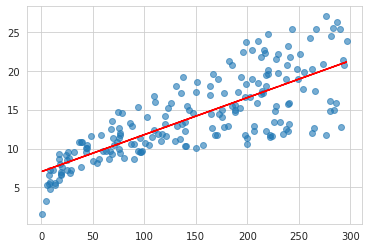

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

print(f'Weight: {lr.coef_}')
print(f'Bias: {lr.intercept_}')
print(f'MSE: {mean_squared_error(y, lr.predict(X))}')

plt.scatter(X, y, alpha=0.6)
plt.plot(X, lr.predict(X), c='r')

plt.show()

## Loss function

As mentioned above, we will use Mean Square Error as our loss function

A loss function is a wrapper around our model function that tells us "how good" our model is at making predictions for a given set of parameters. The loss function has its own curve and its own derivatives. The slope of this curve tells us the direction we should update our weights to make the model more accurate!

For our simple linear equation:

$$y = wx + b$$

MSE can be calculated with the formula:

$$MSE =  \frac{1}{N} \sum_{i=1}^{n} ((wx_i + b) - y_i)^2$$
- $N$ is the total number of observations (data points)
- $\frac{1}{N} \sum_{i=1}^{n}$ is equivalent to the mean
- $y_i$ is the actual value of an observation and $(wx_i + b)$ is our prediction

**Question**: What is the desired value of MSE that we want?
- A: 100
- B: 50
- C: 10
- D: 0

In [ ]:
X[:3]

array([[230.1],
       [ 44.5],
       [ 17.2]])

In [ ]:
y[:3]

array([22.1, 10.4,  9.3])

If we only have 3 rows of data, this is what MSE will look like

$$ MSE = L(w,b) =  \frac{1}{3} ((230.1w + b - 22.1)^2 + (44.5w + b - 10.4)^2 + (17.2w + b - 9.3)^2)$$

So the loss function here is basically just a function with w and b as inputs

**Question**: if b = 0 (meaning we are ignoring b), then what kind of function is L(w)?
- A: linear function (e.g. $ax+b$)
- B: quadratic function (e.g. $ax^2 + bx + c)$
- C: cubic function (e.g. $ax^3 + bx^2 + cx + d)$
- D: I still don't know.....

## Gradient Descent

As mentioned, the loss function has its own curve and its own derivatives

To minimize MSE we need to calculate the gradient of our loss function with respect to our weight and bias

![](https://miro.medium.com/max/1400/0*fU8XFt-NCMZGAWND.)

For those who wants to read more on gradient descent, here is a good quick step-by-step tutorial: https://www.jeremyjordan.me/gradient-descent/


We want to find $w$ and $b$ so that we can minimize the **continuous** and **differentiable** loss function $L(w, b)$. So here are the steps:

1. Initialize a value for $w$ and $b$
2. Calculate predictions $\hat{y}$ on all training observations
3. Calculate the loss value L($w$,$b$)
4. Find $\frac{\partial L}{\partial w_j}$ and $\frac{\partial L}{\partial b}$ 
5. Update our parameters: $\begin{cases} 
w_j = w_j - \alpha\frac{\partial L}{\partial w_j} & for\ j \in \{1, \dots, n\}\\
b = b - \alpha\frac{\partial L}{\partial b}
\end{cases}$

6. Come back to step 2 and repeat until converge/ until some iterations



How to find $\frac{\partial L}{\partial w_j}$ and $\frac{\partial L}{\partial b}$?

$$
L(w, b) = \frac{1}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})^2}
$$
**Solving $\frac{\partial L}{\partial w_j}$**
$$
\frac{\partial L}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)}) \frac{\partial 
\hat{y}^{(i)}}{\partial w_j}} \\
=> \frac{\partial L}{\partial w_j} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)}) x^{(i)}_j} \\
$$



**Solving $\frac{\partial L}{\partial b}$**

$$
\frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}
$$

# Let's put everything together

![](https://i.imgur.com/cp7uxUq.png)

# Model Interpretation

(Taken from Sklearn results above)


- Weight: [0.04753664]
- Bias: 7.032593549127693
- MSE: 10.512652915656757

By learning the best values for weight and bias, we now have an equation that predicts future sales (unit: 1000) based on TV advertising investment (unit: $1000)

$$Sales = .048 * TV + 7.032$$

- Question: What does the intercept (bias) of 7.032 (or 7032 units sold) mean for this particular problem (hint: based on this model's prediction, can a company survive without putting money in TV ads?
    - The intercept is the value of output when the input is 0. In this case, it is the estimated value of sales in the absence of a TV advertising budget. The value of the intercept here is 7.032, which means that without TV advertisements, the number of units sold is 7,032 (Sales*1000 units).
- What happens to sales if we increase TV advertising budget by 1 unit ($1000)
    - The coefficient or the slope is the measure of the change in the output variable per unit change in the input variable. Here, the coefficient of Model is 0.048, which means that if we increase the TV advertising budget by 1 unit ($1000), the sales of the product will increase by approximately 48 units (0.048*1000).

    
- How would this model perform in the real world?

# Multiple-feature linear regression with vectorization

Now we will consider all the features for our sale prediction

In [5]:
# Features: TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']].values
X.shape

(200, 3)

With $X$ is the dataset:
$$
X = 
\begin{pmatrix} 
    x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)} \\
    \dots & \dots & \dots & \dots \\
    x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)} \\
\end{pmatrix}_{m \times n}
$$

With the matrix above, m = 200 and n = 3

With $\vec{w}$ is the weights vector

$$
\begin{pmatrix}
w_1 \\ w_2 \\ \dots \\ w_n
\end{pmatrix}_{n \times 1}
$$

and $b$ is the bias (scalar)

**Question**: what is the exact length of vector w for this dataset? Why?

We will have:


$$
\hat{y} = X@w + b => \begin{pmatrix} y^{(1)} \\ y^{(2)} \\ \dots \\ y^{(m)}\end{pmatrix} = 
\begin{pmatrix} 
    (\sum_{i=1}^{n}{w_ix_i^{(1)}}) + b \\
    (\sum_{i=1}^{n}{w_ix_i^{(2)}}) + b \\
    \dots \\
    (\sum_{i=1}^{n}{w_ix_i^{(m)}}) + b \\
\end{pmatrix}
$$

<div align="center">
    <img src="https://i.imgur.com/b7zoo7n.png" width="600" />
</div>

In [6]:
w = np.zeros(shape=(3,))
b = np.array(0)

In [7]:
print(w.shape)
print(b.shape)

(3,)
()


Let's calculate our predictions y_hat

In [ ]:
# without vectorization
y_hat = []
for i in range(200):
    x_i = X[i] # vector of (3,)
    y_hat_i = np.dot(w,x_i)+b
    y_hat.append(y_hat_i)
y_hat = np.array(y_hat)

In [8]:
# with vectorization
w = np.zeros(shape=(3,1))
y_hat = X@w + b

In [9]:
y_hat.shape

(200, 1)

## Gradient Descent (vectorization)

We want to minimize the **continuous** and **differentiable** loss function $L(w, b)$:

1. Initialize $w^0$, $b^0$
2. Repeat until converge: $\begin{cases} 
w = w - \alpha\frac{\partial L}{\partial w} &\\
b = b - \alpha\frac{\partial L}{\partial b}
\end{cases}$



**Solving $\frac{\partial L}{\partial w}$** (vectorization):
$$
\frac{\partial L}{\partial w} = \frac{2}{m} X^T @ (\hat{y} - y)
$$

**Solving $\frac{\partial L}{\partial b}$**

$$
\frac{\partial L}{\partial b} = \frac{2}{m} \sum_{i=1}^{m}{(\hat{y}^{(i)} - y^{(i)})}
$$

We will learn to implement Gradient Descent to solve Linear Regression from scratch, in our lab, so stay tuned!